# Assembly Stats for Paper Figures

In [45]:
import sys
import os
from pathlib import Path
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
from matplotlib.ticker import PercentFormatter

In [46]:
font_manager.fontManager.addfont("C:\\Users\\basel\\AppData\\Local\\Microsoft\\Windows\\Fonts\\ArtifaktElement-Regular.ttf")

## Figure Setup

In [47]:
font_family = "Georgia"
title_font = font_manager.FontProperties(
    family=font_family,
    weight="normal",
    style="normal",
    size=12
)
legend_font = font_manager.FontProperties(
    family=font_family,
    weight="normal",
    style="normal",
    size=10
)
label_font = font_manager.FontProperties(
    family=font_family,
    weight="normal",
    style="normal",
    size=11
)
train_graph_color = "deepskyblue"
test_graph_color = "xkcd:orangeish"

## Distilled vs Undistilled

In [72]:
model_1200 = [446, 269, 242, 192, 198, 181, 168, 178, 163, 154, 157, 149, 151, 142, 137, 138, 127, 128, 127, 134, 129, 126, 124, 127, 125, 119, 126, 120, 121, 118]
model_1200 = [1-(n/10000) for n in model_1200]
model_1200_train_acc = [0.8825833333333334, 0.9487, 0.95985, 0.9665, 0.9694333333333334, 0.9735833333333334, 0.9759666666666666, 0.9773833333333334, 0.97815, 0.9796666666666667, 0.9812333333333333, 0.9812333333333333, 0.9830833333333333, 0.98425, 0.9850666666666666, 0.9859333333333333, 0.9861833333333333, 0.9872333333333333, 0.9878, 0.9881166666666666, 0.98885, 0.9889833333333333, 0.9893333333333333, 0.9902166666666666, 0.9912166666666666, 0.9922166666666666, 0.9922166666666666, 0.99252166666666666, 0.99282166666666666, 0.99288166666666666]
print(len(model_1200_train_acc))

model_800 = [378, 265, 230, 194, 215, 174, 173, 170, 174, 159, 167, 159, 162, 165, 160, 159, 154, 152, 154, 154, 156, 157, 155, 156, 155, 157, 155, 157, 157, 156]
model_800 = [1-(n/10000) for n in model_800]
model_800_train_acc = [0.8716333333333334, 0.9660666666666666, 0.9767166666666667, 0.98275, 0.9869166666666667, 0.9899, 0.9929833333333333, 0.9946166666666667, 0.9964166666666666, 0.9976333333333334, 0.9985666666666667, 0.9989333333333333, 0.9999333333333333, 0.9999333333333333, 0.9999333333333333, 0.9999333333333333, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

model_800_distilled = [333, 220, 181, 163, 161, 159, 153, 142, 143, 140, 140, 141, 140, 136, 135, 138, 138, 135, 134, 134, 136, 135, 134, 133, 135, 135, 133, 133, 134, 135]
model_800_distilled = [1-(n/10000) for n in model_800_distilled]
model_800_distilled_train_acc = [0.8763833333333333, 0.9747666666666667, 0.9843333333333333, 0.98895, 0.9919666666666667, 0.9934833333333334, 0.9946666666666667, 0.9956166666666667, 0.9956166666666667, 0.9970333333333333, 0.9975,  0.998, 0.99825, 0.99845, 0.9985166666666667, 0.9986666666666667, 0.9988, 0.99885, 0.9989166666666667, 0.999, 0.999, 0.999, 0.9990333333333333, 0.9990833333333333, 0.999133333333333, 0.9991633333333333, 0.999233333333333, 0.999233333, 0.9992533, 0.99925433]

x = range(1, 30+1)

30


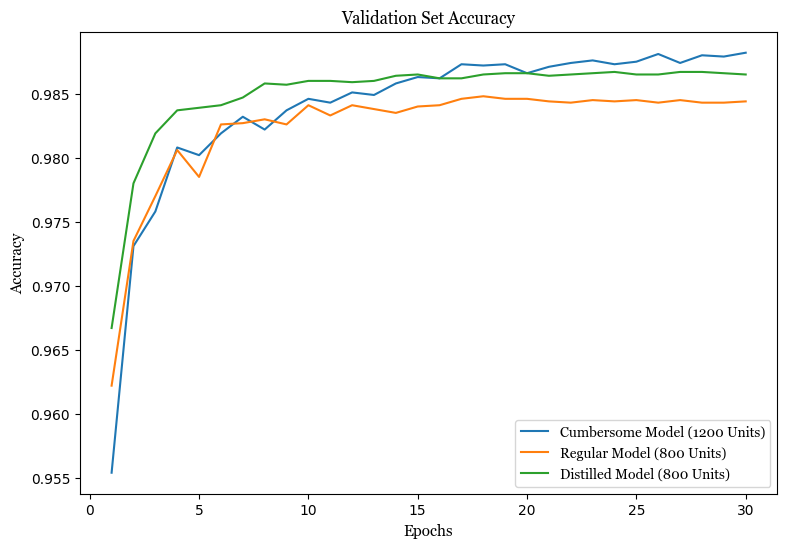

In [73]:
fig, ax = plt.subplots(1, 1, figsize=(9, 6))

ax.plot(x, model_1200, label="Cumbersome Model (1200 Units)")
ax.plot(x, model_800, label="Regular Model (800 Units)")
ax.plot(x, model_800_distilled, label="Distilled Model (800 Units)")

ax.legend(prop=legend_font, loc='lower right')

ax.set_title("Validation Set Accuracy", fontproperties=title_font)
ax.set_xlabel("Epochs", fontproperties=label_font)
ax.set_ylabel("Accuracy", fontproperties=label_font)

plt.savefig("plots/distillation.pdf", bbox_inches="tight")
plt.show()

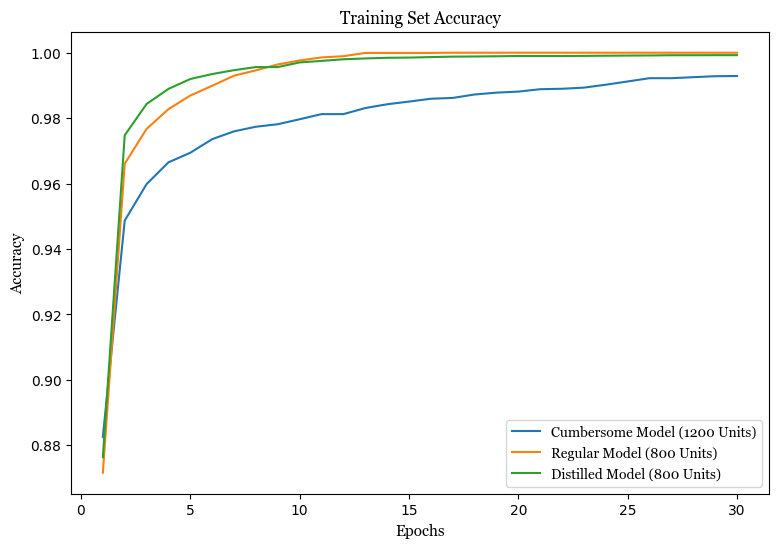

In [74]:
fig, ax = plt.subplots(1, 1, figsize=(9, 6))

ax.plot(x, model_1200_train_acc, label="Cumbersome Model (1200 Units)")
ax.plot(x, model_800_train_acc, label="Regular Model (800 Units)")
ax.plot(x, model_800_distilled_train_acc, label="Distilled Model (800 Units)")

ax.legend(prop=legend_font, loc='lower right')

ax.set_title("Training Set Accuracy", fontproperties=title_font)
ax.set_xlabel("Epochs", fontproperties=label_font)
ax.set_ylabel("Accuracy", fontproperties=label_font)

plt.savefig("plots/distillation.pdf", bbox_inches="tight")
plt.show()

## Temperature vs Incorrect Values (300 params)

In [86]:
incorrect_300 = [190, 183, 148, 144, 150, 144, 145, 136, 136, 138, 135, 137]
incorrect_300 = [1-(n/10000) for n in incorrect_300]
x = range(1, 12+1)

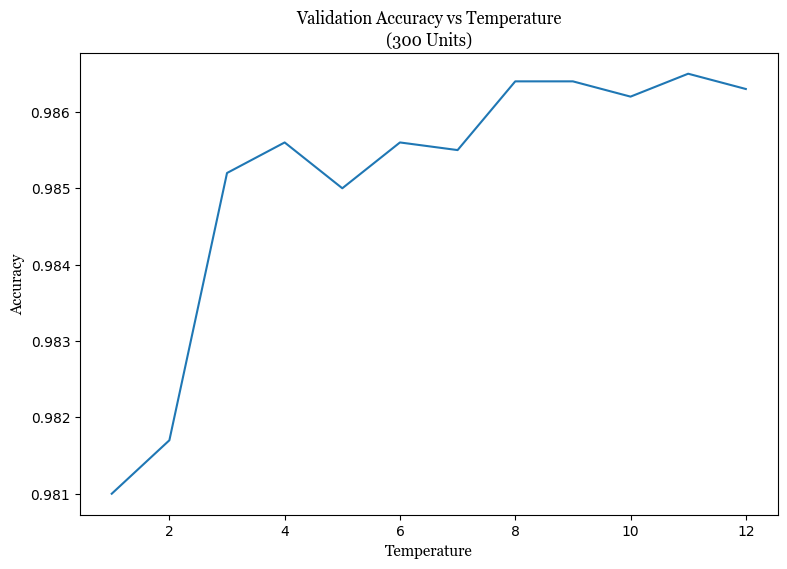

In [87]:
fig, ax = plt.subplots(1, 1, figsize=(9, 6))

ax.plot(x, incorrect_300)

ax.set_title("Validation Accuracy vs Temperature\n(300 Units)", fontproperties=title_font)
ax.set_xlabel("Temperature", fontproperties=label_font)
ax.set_ylabel("Accuracy", fontproperties=label_font)

plt.savefig("plots/300_incorrect_v_temperature.pdf", bbox_inches="tight")
plt.show()

## Temperature vs Incorrect Values (30 params)

In [92]:
incorrect_30 = [329, 327, 318, 296, 282, 276, 249, 252, 267, 264, 251, 243, 257, 238, 279, 264, 276, 260, 262]
incorrect_30 = [1-(n/10000) for n in incorrect_30]
x = [1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9, 9.5, 10]

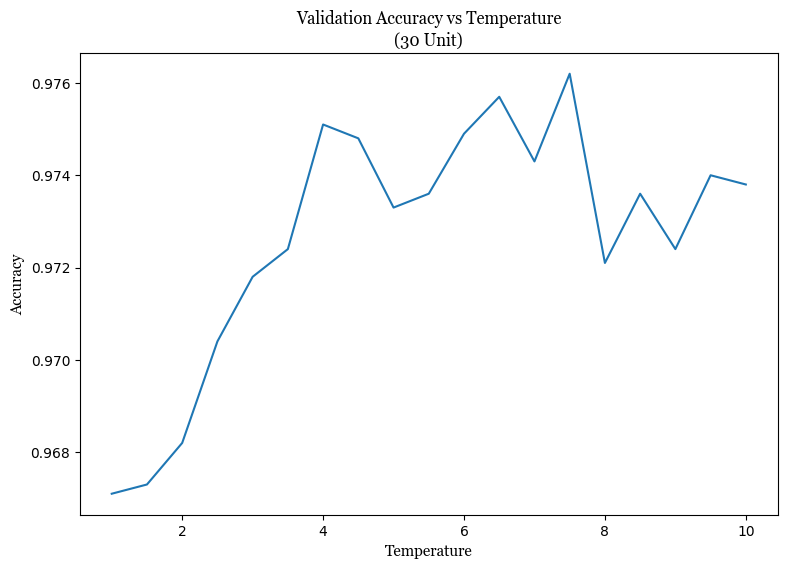

In [93]:
fig, ax = plt.subplots(1, 1, figsize=(9, 6))

ax.plot(x, incorrect_30)

ax.set_title("Validation Accuracy vs Temperature\n(30 Unit)", fontproperties=title_font)
ax.set_xlabel("Temperature", fontproperties=label_font)
ax.set_ylabel("Accuracy", fontproperties=label_font)

plt.savefig("plots/30_incorrect_v_temperature.pdf", bbox_inches="tight")
plt.show()

## Training without 3

In [80]:
wo_3_total_train_acc = [0.8287732342007434, 0.9711710037174721, 0.9823234200743495, 0.9871561338289963, 0.9897026022304832, 0.991542750929368, 0.992992565055762, 0.994089219330855, 0.9948327137546469, 0.9956691449814127, 0.9963382899628253, 0.9967657992565055, 0.996914498141264, 0.9973048327137547, 0.9975650557620818, 0.9976579925650557, 0.9977695167286246, 0.9978810408921933, 0.9980297397769516, 0.9981784386617101, 0.9982899628252788, 0.9982527881040892, 0.9982899628252788, 0.9984014869888476, 0.9982899628252788, 0.9984386617100371, 0.9985687732342008, 0.9985687732342008, 0.9986802973977695, 0.9986802973977695]
wo_3_total = [1351, 1130, 922, 774, 641, 578, 498, 486, 440, 439, 426, 412, 392, 388, 362, 363, 356, 360, 348, 339, 333, 330, 332, 332, 330, 331, 320, 321, 318, 309]
wo_3_total = [1-(n/10000) for n in wo_3_total]
wo_3_three = [988, 905, 726, 610, 484, 430, 354, 354, 305, 303, 300, 279, 262, 263, 236, 240, 231, 232, 224, 217, 212, 206, 209, 213, 204, 207, 197, 201, 195, 190]
wo_3_three = [1-(n/1010) for n in wo_3_three]

w_3_total_train_acc = [0.8250833333333333, 0.97005, 0.9805833333333334, 0.9861166666666666, 0.98905, 0.9913333333333333, 0.9928333333333333, 0.9937333333333334, 0.99465, 0.9951, 0.9958166666666667, 0.9962833333333333, 0.9965666666666667, 0.9967666666666667, 0.9971833333333333, 0.9974666666666666, 0.9974833333333334, 0.9976333333333334, 0.99785, 0.9979833333333333, 0.9979166666666667, 0.9980666666666667, 0.9982666666666666, 0.9982166666666666, 0.9982833333333333, 0.9983166666666666, 0.9983666666666666, 0.9984666666666666, 0.9985333333333334, 0.99855]
w_3_total = [423, 244, 205, 184, 175, 163, 156, 157, 156, 154, 148, 143, 151, 146, 146, 147, 142, 146, 139, 140, 136, 139, 138, 140, 138, 137, 138, 139, 140, 136]
w_3_total = [1-(n/10000) for n in w_3_total]
w_3_three = [40, 30, 24, 16, 20, 17, 16, 15, 18, 16, 16, 16, 15, 16, 14, 15, 16, 17, 17, 15, 17, 17, 17, 16, 16, 16, 16, 17, 17, 16]
w_3_three = [1-(n/1010) for n in w_3_three]

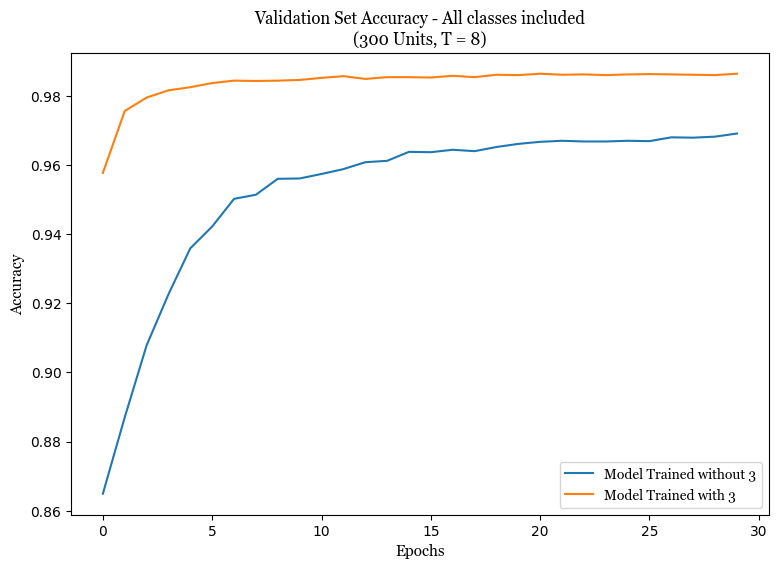

In [81]:
fig, ax = plt.subplots(1, 1, figsize=(9, 6))

ax.plot(wo_3_total, label="Model Trained without 3")
ax.plot(w_3_total, label="Model Trained with 3")

ax.legend(prop=legend_font, loc='lower right')

ax.set_title("Validation Set Accuracy - All classes included\n(300 Units, T = 8)", fontproperties=title_font)
ax.set_xlabel("Epochs", fontproperties=label_font)
ax.set_ylabel("Accuracy", fontproperties=label_font)

plt.savefig("plots/incorrect_without_3_total.pdf", bbox_inches="tight")
plt.show()

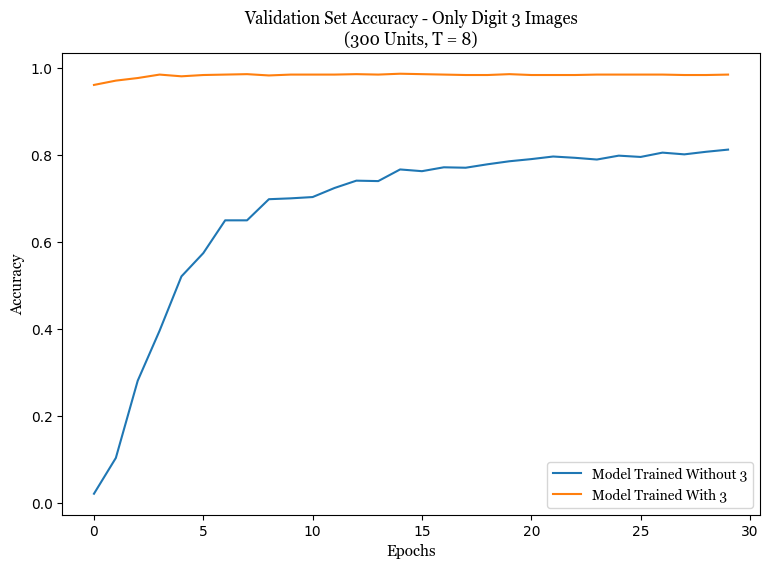

In [82]:
fig, ax = plt.subplots(1, 1, figsize=(9, 6))

ax.plot(wo_3_three, label="Model Trained Without 3")
ax.plot(w_3_three, label="Model Trained With 3")

ax.legend(prop=legend_font, loc='lower right')

ax.set_title("Validation Set Accuracy - Only Digit 3 Images\n(300 Units, T = 8)", fontproperties=title_font)
ax.set_xlabel("Epochs", fontproperties=label_font)
ax.set_ylabel("Accuracy", fontproperties=label_font)

plt.savefig("plots/incorrect_without_3_three.pdf", bbox_inches="tight")
plt.show()

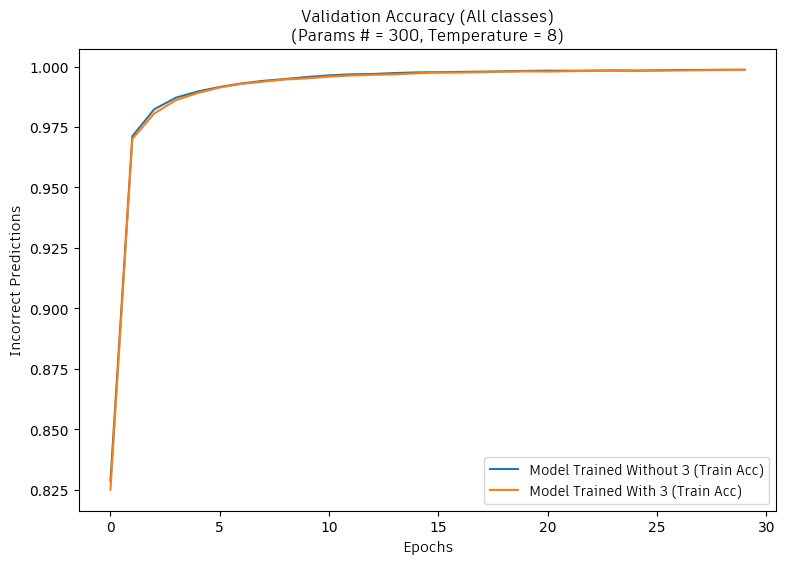

In [36]:
fig, ax = plt.subplots(1, 1, figsize=(9, 6))

ax.plot(wo_3_total_train_acc, label="Model Trained Without 3 (Train Acc)")
ax.plot(w_3_total_train_acc, label="Model Trained With 3 (Train Acc)")

ax.legend(prop=legend_font, loc='lower right')

ax.set_title("Validation Accuracy (All classes)\n(Params # = 300, Temperature = 8)", fontproperties=title_font)
ax.set_xlabel("Epochs", fontproperties=label_font)
ax.set_ylabel("Incorrect Predictions", fontproperties=label_font)

plt.savefig("plots/incorrect_without_3_total.pdf", bbox_inches="tight")
plt.show()